# Group Exercise CLV - Group 6
## Data Prep

Import Packages

In [8]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import re
import pickle

## Load Data


In [9]:
churn_df = pd.read_csv('data/TP_churn_data.csv')
margin_df = pd.read_csv('data/TP_margin_data.csv')
demog_df = pd.read_csv('data/demog_pmm_data.csv')

## Modify margin data to only have ANNUAL margin numbers,
Print stats on the new margin dataframe:

In [10]:
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print(" summary stats on margin data ") 
print(margin_df.describe(include='all').transpose())

 summary stats on margin data 
                   count  unique         top freq        mean          std  \
acct_ID           240368  239356  I152065826    3         NaN          NaN   
margin_Y_neg_1  240368.0     NaN         NaN  NaN  221.160207  1529.891172   
margin_Y_neg_2  240368.0     NaN         NaN  NaN  188.612409  1921.481227   
margin_Y_neg_3  240368.0     NaN         NaN  NaN   165.35382  2129.313273   
margin_Y_pos_1  240368.0     NaN         NaN  NaN   353.59658  2056.654404   

                     min   25%      50%       75%        max  
acct_ID              NaN   NaN      NaN       NaN        NaN  
margin_Y_neg_1 -15084.25  42.2  181.915    337.05  284605.19  
margin_Y_neg_2 -21224.13   0.0   125.45  294.4525  469878.25  
margin_Y_neg_3  -7515.94   0.0   28.255     245.4  493368.29  
margin_Y_pos_1  -3509.67 -2.21  159.395  332.0025  399818.38  


## Visualize Data

Create bar chart to explore churn rates by tiers:

<Axes: title={'center': 'Churn Rate by Tiers'}, xlabel='tier'>

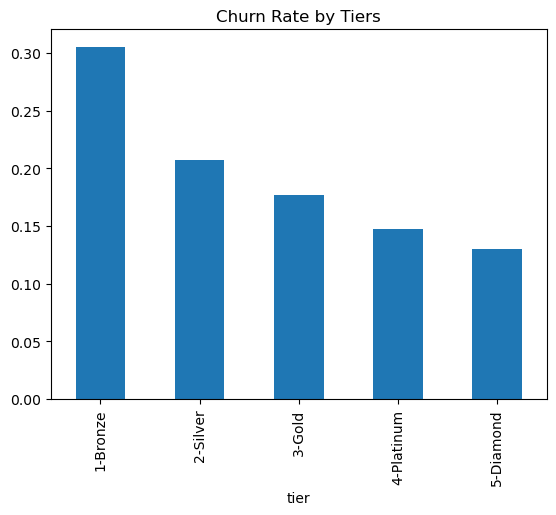

In [11]:
temp_df = churn_df.groupby(['tier'])['churn_year_plus1_ind'].mean()
temp_df.plot.bar(title="Churn Rate by Tiers")

Create histogram to explore distribution of variables in churn data:

<Axes: title={'center': 'Distribution of Purchase Amount'}, ylabel='Frequency'>

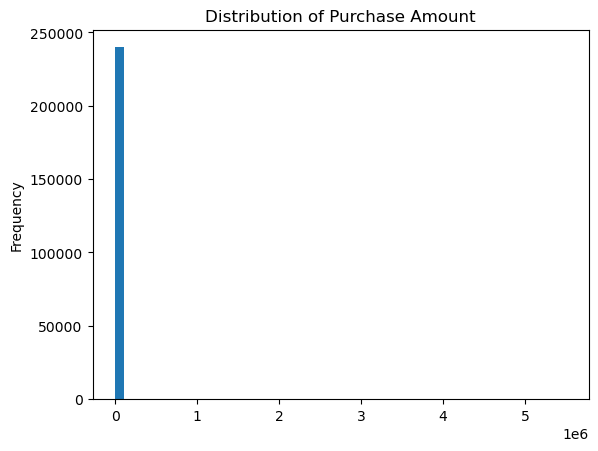

In [12]:
churn_df['purch_amt_life'].plot.hist(title="Distribution of Purchase Amount",bins=50)

Create histogram to explore distribution of variables in margin data:

<Axes: title={'center': 'Distribution of Prior Year Margin'}, ylabel='Frequency'>

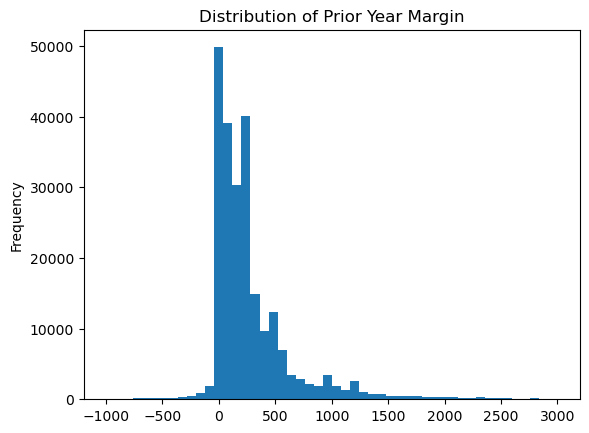

In [13]:
temp_df = margin_df.query('-1000<margin_Y_neg_1<3000')
temp_df['margin_Y_neg_1'].plot.hist(title="Distribution of Prior Year Margin",bins=50)

## Feature engineering on the Churn data:

In [14]:
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                             count  unique         top    freq       mean  \
ST                          240368      61          TX   21633        NaN   
Zip                         240368   26124     missing     894        NaN   
DMA                         240368     216         803    9721        NaN   
Area_Cd                     240368     384     missing   13090        NaN   
emailable                 240368.0     NaN         NaN     NaN   0.514931   
solicit_ph_ind            240368.0     NaN         NaN     NaN   0.892619   
solicit_email_ind         240368.0     NaN         NaN     NaN   0.964118   
fixd_incm_flg             240368.0     NaN         NaN     NaN   0.092296   
scheduled_purchase_flg    240368.0     NaN         NaN     NaN   0.259989   
months_since_last_trans   240368.0     NaN         NaN     NaN   2.915554   
months_since_first_trans  240368.0     NaN         NaN     NaN  65.444868   
purch_avg_interval        240368.0     NaN    

### Feature Engineering On State Codes
Drop original high cardinality column in favor of regions

In [15]:
# Mapping dictionary for all 50 states to regions
state_to_region = {
    'AL': 'South', 'AK': 'Alaska', 'AZ': 'Southwest', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'Northeast', 'FL': 'South', 'GA': 'South',
    'HI': 'Hawaii', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'Southeast', 'LA': 'South', 'ME': 'Northeast', 'MD': 'Northeast',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'Midwest', 'NE': 'Midwest', 'NV': 'Southwest', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'Southwest', 'NY': 'Northeast', 'NC': 'Southeast', 'ND': 'Midwest', 'OH': 'Northeast',
    'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'Southeast',
    'SD': 'Midwest', 'TN': 'Southeast', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'Southeast', 'WA': 'West', 'WV': 'Southeast', 'WI': 'Midwest', 'WY': 'Midwest'
}

# Create a new 'Region' column based on the 'ST' column
churn_df['Region'] = churn_df['ST'].map(state_to_region)

# Fill NaN's
churn_df['Region'] = churn_df['Region'].fillna('Other')

## Feature engineering on margin data, while keeping original variables.
Using logs with an offset that will account for very large negative margins:

In [16]:
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

## More Visualization

Histogram on transformed target for Margin data

<Axes: title={'center': 'Distribution of LOG of Future Margin'}, ylabel='Frequency'>

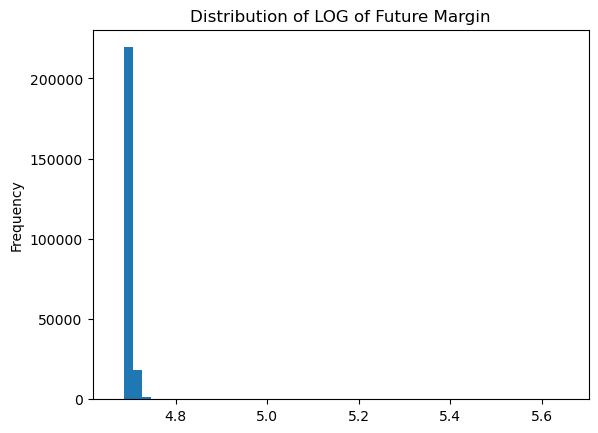

In [17]:
margin_df['log_margin_Y_pos_1'].plot.hist(title="Distribution of LOG of Future Margin",bins=50)

Scatter plot on Future Margin vs Prior Margin (logarithms):

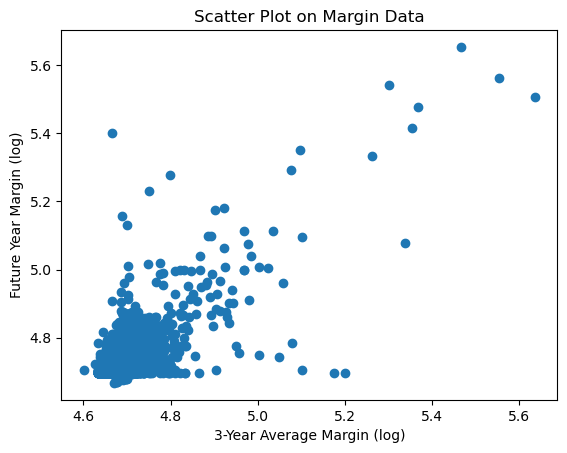

In [18]:
plt.scatter(margin_df['log_margin_3yr_avg'], margin_df['log_margin_Y_pos_1'])
plt.xlabel("3-Year Average Margin (log)")
plt.ylabel("Future Year Margin (log)")
plt.title("Scatter Plot on Margin Data")
print(" ") 
plt.show()

## Join Churn and Margin data with Demographics by acct_ID:

Eliminating duplicate acct_IDs before joining data:

In [19]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(239356, 32)

In [20]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(239356, 11)

In [21]:
demog_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
demog_df.shape

(239356, 11)

Perform Joins

In [22]:
combined_df = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')

In [23]:
combined_df = pd.merge(combined_df, demog_df, on='acct_ID', how='inner')

## Demographics Transformations

Transform **demog_LOR** to numerical **LOR**

In [24]:
# Custom function to extract numeric part
def extract_numeric(value):
    if value == '20 or more Years':
        return int(21*12+6)
    elif 'Year' in value:
        return int(re.search(r'\d+', value).group())*12+6
    elif 'Months' in value:
        return int(re.search(r'\d+', value).group())+3
    else:
        return None

# Apply the custom function to the column
combined_df['LOR'] = combined_df['demog_LOR'].apply(extract_numeric)

# Drop original column
combined_df.drop('demog_LOR', axis=1, inplace=True)

Transform **demog_assets** to numerical **Assets**

In [25]:
# Custom function to extract numeric part
def extract_numeric_assets(value):
    if value == 'IPA <= 25000':
        return int(1)
    else:
        return int(re.search(r'\d+', value).group())

# Apply the custom function to the column
combined_df['Assets'] = combined_df['demog_assets'].apply(extract_numeric_assets)

# Drop original column
combined_df.drop('demog_assets', axis=1, inplace=True)

Transform **demog_inc_fine** to numerical **Inc_Fine**

In [26]:
# Custom function to extract numeric part
def extract_numeric_assets(value):
    if value == 'Less than $15000':
        return int(1)
    else:
        return int(re.search(r'\d+', value).group())

# Apply the custom function to the column
combined_df['Inc_Fine'] = combined_df['demog_inc_fine'].apply(extract_numeric_assets)

# Drop original column
combined_df.drop('demog_inc_fine', axis=1, inplace=True)

Transform **demog_inc_crs** to numerical **Inc_Crs**

In [27]:
# Custom function to extract numeric part
def extract_numeric_assets(value):
    if value == 'Less than $15000':
        return int(1)
    else:
        return int(re.search(r'\d+', value).group())

# Apply the custom function to the column
combined_df['Inc_Crs'] = combined_df['demog_inc_crs'].apply(extract_numeric_assets)

# Drop original column
combined_df.drop('demog_inc_crs', axis=1, inplace=True)

Transform **demog_age** to numeric **Age**

In [28]:
# Replace specific values
combined_df['Age'] = combined_df['demog_age'].replace({'18-24 years old': 20, '25-34 years old': 30, '35-44 years old': 40, '45-54 years old': 50, '55-64 years old': 60, '65-74 years old': 70, '75+ years old': 80})

# Drop original column
combined_df.drop('demog_age', axis=1, inplace=True)

Transform **demog_homevalue** to numerical **Home_Value**

In [29]:
# Custom function to extract numeric part
def extract_numeric_assets(value):
    if value == 'Less than $50000':
        return int(1)
    else:
        return int(re.search(r'\d+', value).group())

# Apply the custom function to the column
combined_df['Home_Value'] = combined_df['demog_homevalue'].apply(extract_numeric_assets)

# Drop original column
combined_df.drop('demog_homevalue', axis=1, inplace=True)

List of Demographics Categorical Columns to Encode

In [30]:
additions_to_OHC = ['demog_ownrent','Region']

original_OHC_list = ['ST', 'tier', 'tier_prev']

full_OHC_list = original_OHC_list + additions_to_OHC

## Create dummy variables for certain categorical variables.

In [31]:
""" WARNING: this commented-out approach would create dummy indicators for all """
"""    categorical variables, including those with very high cardinality, such as zip codes """
"""    and also would drop the original categorical variables and only keep the dummy indicators """

""" combined_df = pd.get_dummies(combined_df) """

""" this approach hand-picks only certain variables for which to create dummy indicators """
""" and keeps the original variables too """

for column in full_OHC_list:
    dummies = pd.get_dummies(combined_df[column],prefix=column)
    combined_df[dummies.columns] = dummies

print(" ") 
print("New dataset with dummies") 
print(" ") 
print(combined_df.head(10)) 
print(" ") 
print("Columns in new data")
print(" ") 
print(combined_df.dtypes)

 
New dataset with dummies
 
   ST      Zip  DMA  Area_Cd  emailable  solicit_ph_ind  solicit_email_ind  \
0  SC    29607  567      864          1               1                  1   
1  MO    63901  632      573          1               1                  1   
2  IL    60456  602  missing          0               1                  1   
3  FL    34698  539      727          1               1                  1   
4  CA    92084  825      760          0               1                  1   
5  MI    48446  505      810          1               0                  1   
6  AL    35020  630      205          0               1                  1   
7  PR  missing  998  missing          0               1                  1   
8  AZ    85232  753      520          1               1                  1   
9  CA    95691  862      916          1               1                  1   

   fixd_incm_flg  scheduled_purchase_flg  months_since_last_trans  ...  \
0              0                      

C:\Users\ruthv\AppData\Local\Temp\ipykernel_25420\3773644615.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df[dummies.columns] = dummies
C:\Users\ruthv\AppData\Local\Temp\ipykernel_25420\3773644615.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df[dummies.columns] = dummies
C:\Users\ruthv\AppData\Local\Temp\ipykernel_25420\3773644615.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

## Export *combined_df* as Pickle

In [32]:
with open('combined_df.pkl', 'wb') as file:
    pickle.dump(combined_df, file)